In [8]:
import numpy as np
from setup import *

In [9]:
def load_iris():
    from sklearn.datasets import load_iris
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.model_selection import train_test_split

    # Load the iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #split the train set into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    # One-hot encode the target variable
    encoder = OneHotEncoder()
    y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
    return X_train, X_val, X_test, y_train, y_val, y_test, y_train_encoded

In [10]:
def initialize_network():
    network = Network(output_function=Softmax())
    # network.add_layer(Layer(num_inputs=4, num_neurons=10, activation=ReLU(),learning_rate=0.01))
    network.add_layer(Layer(num_inputs=4, num_neurons=3, activation=Sigmoid(),learning_rate=0.01))
    return network

In [11]:
test_error, training_errors, validation_errors = train_model(
    batch_size=10,
    num_epochs=100,
    dataset=load_iris,
    network=initialize_network(),
    error_function=lambda y_true, y_pred: np.mean(y_true != y_pred)
)
print(f"Test error: {test_error:.4f}")

Test error: 0.6667


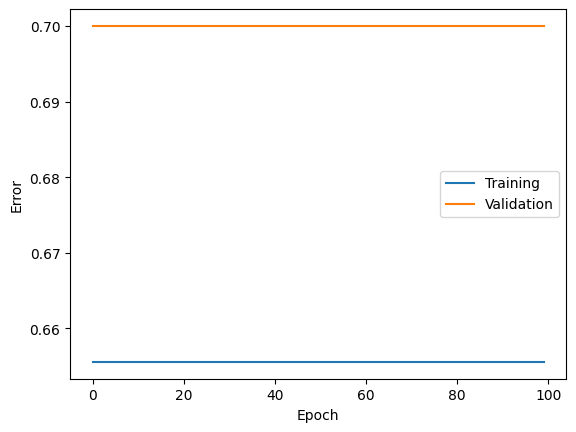

In [12]:
import matplotlib.pyplot as plt
# Plot the accuracy
plt.plot(training_errors)
plt.plot(validation_errors)
plt.xlabel('Epoch')
plt.ylabel('Error')

plt.legend(['Training', 'Validation'])
plt.show()